<a href="https://colab.research.google.com/github/terminate9298/K-Nearest-Neighbours-Implementation/blob/main/K%20Nearest%20Neighbours%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from IPython.display import Markdown
from IPython.display import Image
from IPython.display import clear_output
display(Markdown("<center><br><h1>Implementing K Nearest Neighbours For Data Mining Class</h1><center><br><br>"))


<center><br><h1>Implementing K Nearest Neighbours For Data Mining Class</h1><center><br>

In [34]:
def euclidean(X , Y):
  return np.sqrt(((X-Y)**2).sum())

def manhattan(X , Y):
  return np.abs((X-Y)).sum()


class KNN:
  def __init__(self , use_distance = 'euc' , K = 'auto'):
    if use_distance == 'euc':
      self.distance = euclidean
    elif use_distance ==  'man':
      self.distance = manhattan
    
    self.K = K
  
  def fit(self , X , Y):
    self.X = X
    self.Y = Y
    if self.K == 'auto':
      self.K = 5
  
  def predict_one(self , X):
    if X.shape[0] != self.X.shape[1]:
      raise Exception('Wrong Sized Data. Size Mismatch')
    else:
      dis = []
      for i in range(self.X.shape[0]):
        dis.append([self.distance(self.X[i] , X) , self.Y[i]])
      dis = np.array(dis)
      dis = dis[dis[:,0].argsort(kind = 'mergesort')]
      vals , count = np.unique(dis[:self.K], return_counts=True)
      return vals[np.argmax(count)]
  
  def predict(self , X):
    if X.shape[1] != self.X.shape[1]:
      raise Exception('Wrong Sized Data. Size Mismatch')
    else:
      dis = []
      for i in X:
        dis.append(self.predict_one(i))
      dis = np.array(dis)
      return dis
  def predict_accuracy(self , X , Y):
    dis = self.predict(X)
    acc = sum(1 for x,y in zip(dis,Y) if x == y) / len(dis)
    return acc

def print_accuracy(acc , pred , cm = True):
  print('  -> Precision Score of KNN Algorithm is ',round(precision_score(pred, acc)*100,2))
  print('  -> Recall Score of KNN Algorithm is ',round(recall_score(pred, acc)*100,2))
  print('  -> Accuracy Score of KNN Algorithm is ',round(accuracy_score(pred, acc)*100,2))
  print('  -> F1 Score of KNN Algorithm is ',round(f1_score(pred,acc)*100,2))
  if cm:
    cf_matrix = confusion_matrix(acc,pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


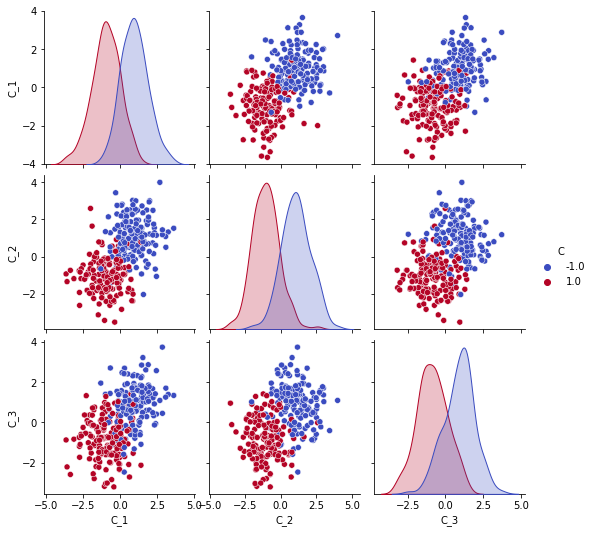

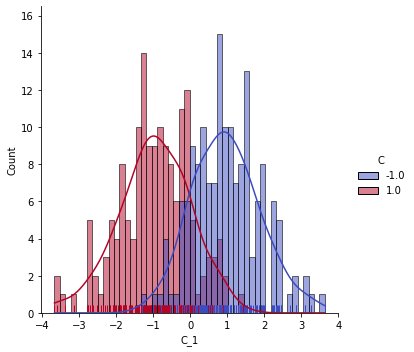

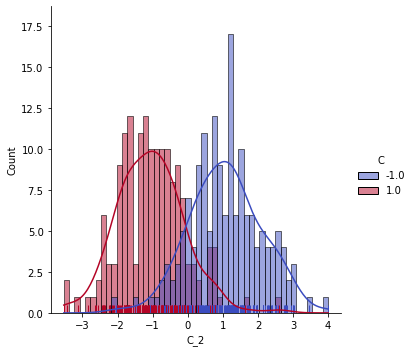

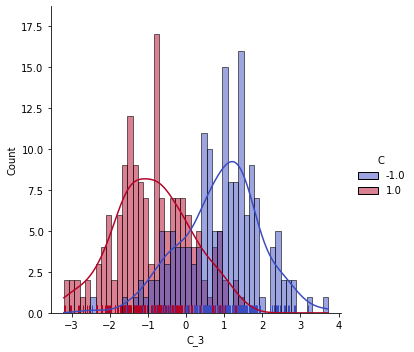

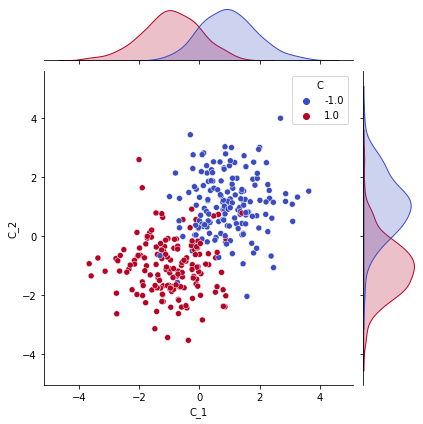

In [17]:
class_1 = np.concatenate((np.random.normal(loc = -1, scale = 1 , size = (200,3)),np.array([1]*200).reshape(200,1)) , axis = 1)
class_2 = np.concatenate((np.random.normal(loc =  1, scale = 1 , size = (200,3)),np.array([-1]*200).reshape(200,1)) , axis = 1)
train, test = pd.DataFrame(np.concatenate((class_1[:160],class_2[:160]),axis = 0), columns = ('C_1','C_2','C_3','C')) , pd.DataFrame(np.concatenate((class_1[160:],class_2[160:]),axis = 0), columns = ('C_1','C_2','C_3','C')) 
train , test = train.sample(frac = 1) , test.sample(frac = 1)

sns.pairplot(train, hue ="C", palette ='coolwarm')
sns.displot(data = train , x = 'C_1', kde = True, rug = True, color ='red', bins = 50, hue = 'C' ,palette ='coolwarm') 
sns.displot(data = train , x ='C_2', kde = True, rug = True, color ='blue', bins = 50, hue = 'C' ,palette ='coolwarm') 
sns.displot(data = train , x ='C_3', kde = True, rug = True, color ='green', bins = 50, hue = 'C' ,palette ='coolwarm') 
sns.jointplot(x= 'C_1' , y = 'C_2',data =train , hue = 'C',palette ='coolwarm')

In [28]:
display(Markdown("<h2>Implementing K Nearest Neighbours With Euclidean Distance </h2><br>")

<h2>Implementing K Nearest Neighbours With Euclidean Distance </h2><br>

<h4>Results for KNN Algorithm for K = 3 are : </h4>

  -> Precision Score of KNN Algorithm is  95.12
  -> Recall Score of KNN Algorithm is  97.5
  -> Accuracy Score of KNN Algorithm is  96.25
  -> F1 Score of KNN Algorithm is  96.3


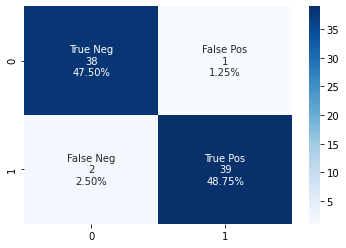

In [35]:
knn = KNN(K = 3)
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 3 are : </h4>"))
print_accuracy(out , test[['C']].values )

<h4>Results for KNN Algorithm for K = 5 are : </h4>

  -> Precision Score of KNN Algorithm is  95.0
  -> Recall Score of KNN Algorithm is  95.0
  -> Accuracy Score of KNN Algorithm is  95.0
  -> F1 Score of KNN Algorithm is  95.0


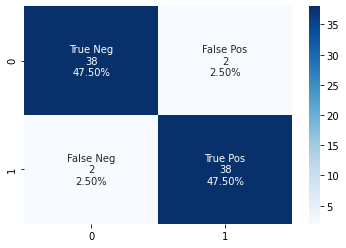

In [36]:
knn = KNN(K = 5)
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 5 are : </h4>"))
print_accuracy(out , test[['C']].values )


<h4>Results for KNN Algorithm for K = 7 are : </h4>

  -> Precision Score of KNN Algorithm is  95.12
  -> Recall Score of KNN Algorithm is  97.5
  -> Accuracy Score of KNN Algorithm is  96.25
  -> F1 Score of KNN Algorithm is  96.3


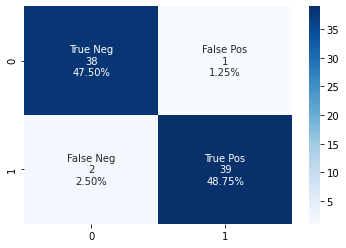

In [37]:

knn = KNN(K = 7)
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 7 are : </h4>"))
print_accuracy(out , test[['C']].values )

In [39]:
display(Markdown("<h2>Implementing K Nearest Neighbours With Manhattan Distance </h2><br>"))

<h2>Implementing K Nearest Neighbours With Manhattan Distance </h2><br>

<h4>Results for KNN Algorithm for K = 3 are : </h4>

  -> Precision Score of KNN Algorithm is  95.12
  -> Recall Score of KNN Algorithm is  97.5
  -> Accuracy Score of KNN Algorithm is  96.25
  -> F1 Score of KNN Algorithm is  96.3


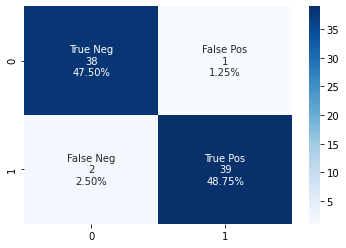

In [40]:
knn = KNN(K = 3, use_distance = 'man')
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 3 are : </h4>"))
print_accuracy(out , test[['C']].values )

<h4>Results for KNN Algorithm for K = 5 are : </h4>

  -> Precision Score of KNN Algorithm is  95.12
  -> Recall Score of KNN Algorithm is  97.5
  -> Accuracy Score of KNN Algorithm is  96.25
  -> F1 Score of KNN Algorithm is  96.3


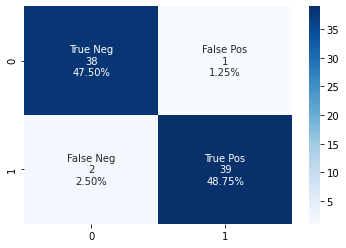

In [41]:
knn = KNN(K = 5, use_distance = 'man')
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 5 are : </h4>"))
print_accuracy(out , test[['C']].values )

<h4>Results for KNN Algorithm for K = 7 are : </h4>

  -> Precision Score of KNN Algorithm is  95.12
  -> Recall Score of KNN Algorithm is  97.5
  -> Accuracy Score of KNN Algorithm is  96.25
  -> F1 Score of KNN Algorithm is  96.3


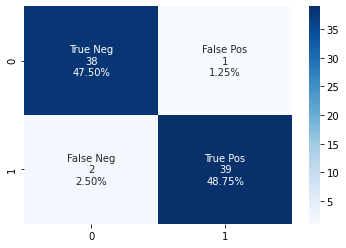

In [42]:
knn = KNN(K = 7, use_distance = 'man')
knn.fit(train[['C_1','C_2','C_3']].values , train[['C']].values)
out = knn.predict(test[['C_1','C_2','C_3']].values )
display(Markdown("<h4>Results for KNN Algorithm for K = 7 are : </h4>"))
print_accuracy(out , test[['C']].values )